# Exploring Why Civil Resistance Works

In this assignment, you will replicate some of the findings of a well-received book, [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erica Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. They found that yes; from a data set containing details of campaigns from 1900 onwards, they found that in general peaceful campaigns are more effective in achieving their aims than violent ones.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Exploration of Historical Trends

Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

In [2]:
navco = pd.read_csv('NAVCO 1.2 Updated.csv')
navco.head()

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
0,4,Afghans,Afghanistan,1978,1979,Afghan government,1,0,0,0,...,0,613,10000.0,0.0006,1,1,NaN,1.0,1,1
1,3,Afghan resistance,Afghanistan,1980,1989,Soviet occupation,1,0,0,0,...,0,3281,10000.0,0.0007,1,0,NaN,1.0,0,1
2,218,Taliban/anti-government forces,Afghanistan,1992,1996,Afghan regime,1,0,0,0,...,0,1370,20000.0,0.0009,1,0,NaN,1.0,0,0
3,217,Taliban,Afghanistan,2001,2014,Afghan government,0,0,1,1,...,0,4391,60000.0,0.0016,1,1,NaN,1.0,1,0
4,5,Albanian anti-communist,Albania,1990,1991,Communist regime,1,0,0,0,...,0,442,300000.0,0.0911,1,0,0.0,1.0,1,0


In [3]:
campaigns_by_years = navco[['EYEAR', 'VIOL', 'NONVIOL']]
campaigns_by_years.loc[:,'EYEAR'] = campaigns_by_years['EYEAR'] // 10 * 10
campaigns_by_years = campaigns_by_years.sort_values(by='EYEAR', ascending=True).groupby('EYEAR')[['VIOL', 'NONVIOL']].sum().reset_index()
campaigns_by_years.columns = ['Decade', 'Violent', 'Nonviolent']
campaigns_by_years.set_index('Decade', inplace=True)
campaigns_by_years

,Violent,Nonviolent
Decade,,
1940,12,2
1950,25,9
1960,21,8
1970,27,13
1980,17,30
1990,54,36
2000,23,37
2010,41,34


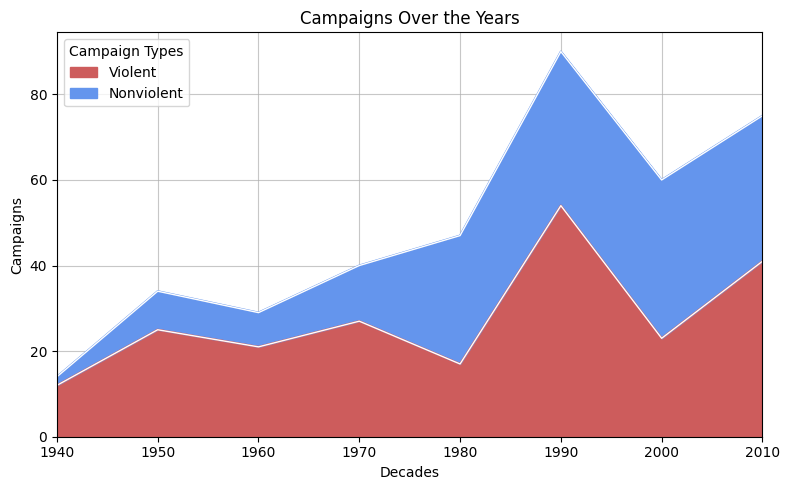

In [4]:
ax = campaigns_by_years.plot.area(figsize=(8, 5), color=['indianred', 'cornflowerblue'])

ax.set_xlabel("Decades")
ax.set_ylabel("Campaigns")
ax.set_title("Campaigns Over the Years")

ax.legend(title="Campaign Types", loc='upper left')

ax.set_axisbelow(True)

plt.grid(True, linestyle='-', alpha=0.7)
plt.margins(0, 0)

ax.plot(campaigns_by_years.index, campaigns_by_years['Violent'], color='white', linewidth=1)
ax.plot(campaigns_by_years.index, campaigns_by_years.sum(axis=1), color='white', linewidth=1)

plt.tight_layout()
plt.show()

In [5]:
nonviol_success_by_years = navco[navco['NONVIOL']==1][['EYEAR', 'NONVIOL', 'SUCCESS']]
nonviol_success_by_years.loc[:,'EYEAR'] = nonviol_success_by_years['EYEAR'] // 10 * 10
nonviol_success_by_years = nonviol_success_by_years.sort_values(by='EYEAR', ascending=True).groupby('EYEAR')[['NONVIOL', 'SUCCESS']].sum().reset_index()
nonviol_success_by_years.loc[:, 'SUCCESS'] = (nonviol_success_by_years['SUCCESS'] / nonviol_success_by_years['NONVIOL']).round(2)
nonviol_success_by_years.columns = ['Decade', 'Nonviolent', 'Success Percentage']
nonviol_success_by_years.set_index('Decade', inplace=True)
nonviol_success_by_years

,Nonviolent,Success Percentage
Decade,,
1940,2,0.50
1950,9,0.22
1960,8,0.25
1970,13,0.54
1980,30,0.47
1990,36,0.83
2000,37,0.68
2010,34,0.38


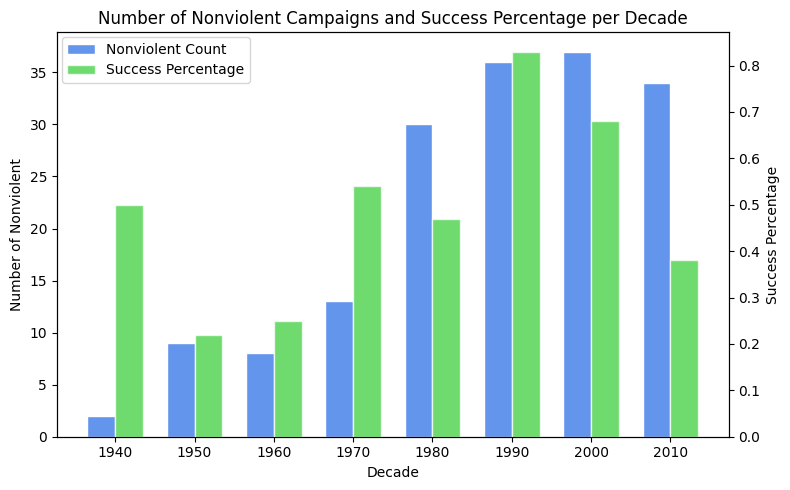

In [15]:
# Data
decades = nonviol_success_by_years.index
nonviolent_counts = nonviol_success_by_years['Nonviolent']
success_percentages = nonviol_success_by_years['Success Percentage']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the left axis (Nonviolent count)
bar_width = 0.35
bar1 = np.arange(len(decades))
bar2 = [x + bar_width for x in bar1]

ax1.bar(bar1, nonviolent_counts, width=bar_width, edgecolor='white', linewidth=1, color='cornflowerblue', label='Nonviolent Count')

# Configure the left axis
ax1.set_xlabel('Decade')
ax1.set_ylabel('Number of Nonviolent')
ax1.set_xticks([r + bar_width / 2 for r in range(len(decades))])
ax1.set_xticklabels(decades)
ax1.tick_params('y')

# Create a second y-axis for the right axis (Success Percentage)
ax2 = ax1.twinx()

# Configure the right axis
ax2.bar(bar2, success_percentages, width=bar_width, edgecolor='white', linewidth=1, color='limegreen', alpha=0.7, label='Success Percentage')
ax2.set_ylabel('Success Percentage')
ax2.tick_params('y')

# Title and legend
plt.title('Number of Nonviolent Campaigns and Success Percentage per Decade')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.075, 0.93))

# Show the plot
plt.show()



In [10]:
campaigns_success_by_years = navco[['EYEAR', 'NONVIOL', 'VIOL']]
campaigns_success_by_years['NONVIOL SUCCESS'] = navco[navco['NONVIOL']==1]['SUCCESS']
campaigns_success_by_years['VIOL SUCCESS'] = navco[navco['VIOL']==1]['SUCCESS']
campaigns_success_by_years.loc[:,'EYEAR'] = campaigns_success_by_years['EYEAR'] // 10 * 10
campaigns_success_by_years = campaigns_success_by_years.sort_values(by='EYEAR', ascending=True).groupby('EYEAR')[['NONVIOL', 'VIOL', 'NONVIOL SUCCESS', 'VIOL SUCCESS']].sum().reset_index()
campaigns_success_by_years.loc[:, 'NONVIOL SUCCESS'] = (campaigns_success_by_years['NONVIOL SUCCESS'] / campaigns_success_by_years['NONVIOL']).round(2)
campaigns_success_by_years.loc[:, 'VIOL SUCCESS'] = (campaigns_success_by_years['VIOL SUCCESS'] / campaigns_success_by_years['VIOL']).round(2)
campaigns_success_by_years.columns = ['Decade', 'Nonviolent', 'Violent', 'Nonviolent Success Rate', 'Violent Success Rate']
campaigns_success_by_years.set_index('Decade', inplace=True)
campaigns_success_by_years

/tmp/ipykernel_60127/2025387825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaigns_success_by_years['NONVIOL SUCCESS'] = navco[navco['NONVIOL']==1]['SUCCESS']
/tmp/ipykernel_60127/2025387825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaigns_success_by_years['VIOL SUCCESS'] = navco[navco['VIOL']==1]['SUCCESS']


,Nonviolent,Violent,Nonviolent Success Rate,Violent Success Rate
Decade,,,,
1940,2,12,0.50,0.50
1950,9,25,0.22,0.32
1960,8,21,0.25,0.19
1970,13,27,0.54,0.44
1980,30,17,0.47,0.29
1990,36,54,0.83,0.28
2000,37,23,0.68,0.13
2010,34,41,0.38,0.07


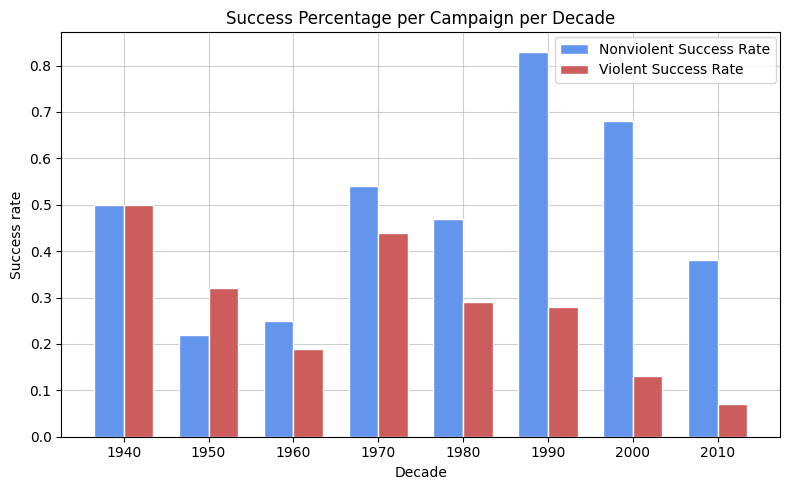

In [24]:
# Data
decades = campaigns_success_by_years.index
nonviolent_success = campaigns_success_by_years['Nonviolent Success Rate']
violent_success = campaigns_success_by_years['Violent Success Rate']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the left axis (Nonviolent count)
bar_width = 0.35
bar1 = np.arange(len(decades))
bar2 = [x + bar_width for x in bar1]

ax1.bar(bar1, nonviolent_success, width=bar_width, edgecolor='white', linewidth=1, color='cornflowerblue', label='Nonviolent Success Rate')
ax1.bar(bar2, violent_success, width=bar_width, edgecolor='white', linewidth=1, color='indianred', label='Violent Success Rate')

# Configure the left axis
ax1.set_xlabel('Decade')
ax1.set_ylabel('Success rate')
ax1.set_xticks([r + bar_width / 2 for r in range(len(decades))])
ax1.set_xticklabels(decades)
ax1.tick_params('y')

ax1.set_axisbelow(True)

plt.grid(True, linestyle='-', alpha=0.6)

# Title and legend
plt.title('Success Percentage per Campaign per Decade')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.985, 0.93))

# Show the plot
plt.show()

## 2. Largest Resistance Campaigns, 1946-2014

Create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%. The plot should look like the one below.

Investigate, outside the largest resistance campaigns, if you can find anything about Greece.

In [75]:
largest_campaigns = navco[navco['PERCENTAGE POPULAR PARTICIPATION'] >= 0.02][['LOCATION', 'TARGET', 'PERCENTAGE POPULAR PARTICIPATION', 'SUCCESS', 'LIMITED', 'FAILURE']]
largest_campaigns = largest_campaigns.sort_values(by='PERCENTAGE POPULAR PARTICIPATION')
largest_campaigns.loc[:, 'PERCENTAGE POPULAR PARTICIPATION'] = (largest_campaigns['PERCENTAGE POPULAR PARTICIPATION'] * 100).round(2)
largest_campaigns['CAMPAIGN'] = largest_campaigns['LOCATION'] + ": " + largest_campaigns['TARGET']
largest_campaigns.set_index('CAMPAIGN', inplace=True)
largest_campaigns = largest_campaigns[['PERCENTAGE POPULAR PARTICIPATION', 'SUCCESS', 'LIMITED', 'FAILURE']]
largest_campaigns

,PERCENTAGE POPULAR PARTICIPATION,SUCCESS,LIMITED,FAILURE
CAMPAIGN,,,,
Hungary: communist regime,2.03,0,0,1
East Germany: Communist regime,2.20,0,0,1
Ukraine: President Yanukovych,2.21,1,0,0
South Korea: Mil govt,2.40,1,0,0
Serbia: Milosevic regime,2.66,1,0,0
Maldives: Gayoom Regime,2.76,1,0,0
Tonga: Government,2.95,0,1,0
Madagascar: Radsiraka regime,2.98,1,0,0
Yemen Arab Republic: al-Sallal regime,3.15,0,1,0


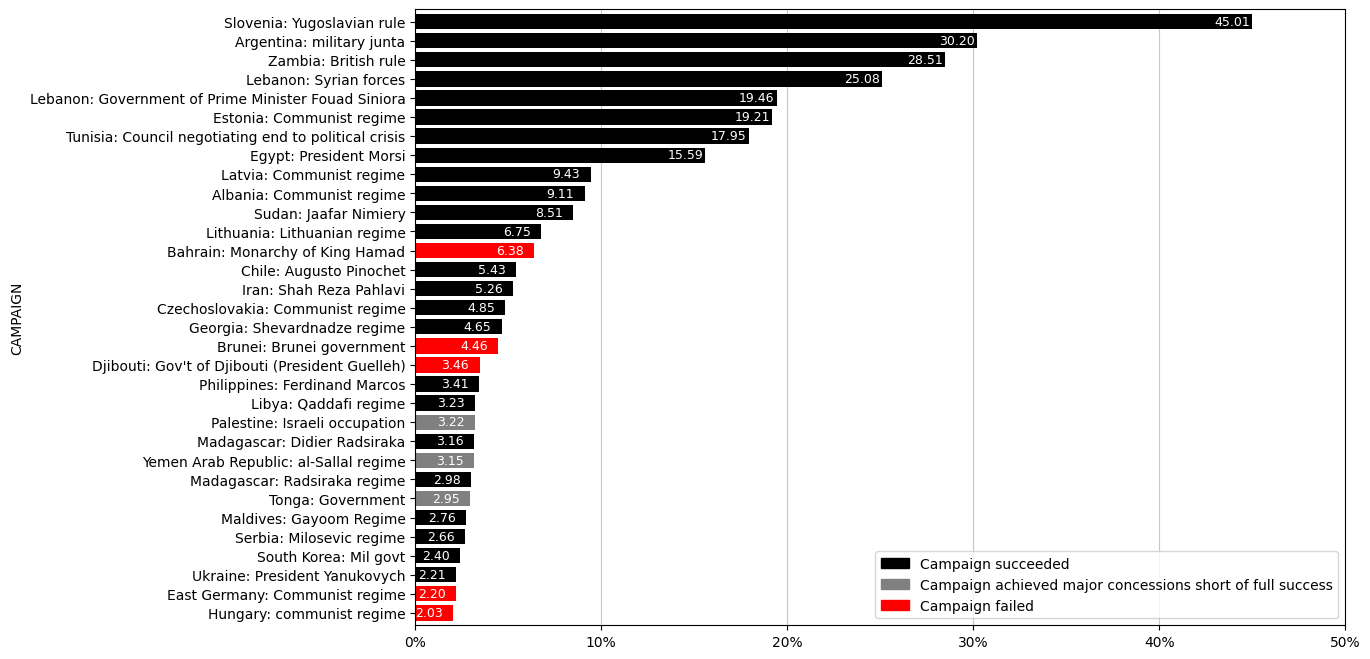

In [93]:
colors = np.where(largest_campaigns['SUCCESS'] == 1, 'black', 
                  np.where(largest_campaigns['LIMITED'] == 1, 'grey', 'red'))

ax = largest_campaigns['PERCENTAGE POPULAR PARTICIPATION'].plot(kind='barh', figsize=(12, 8), width=0.8, color=colors)

ax.set_xlim(0, 50)
ax.set_xticks(range(0, 51, 10))
ax.set_xticklabels([f'{x}%' for x in range(0, 51, 10)])

ax.set_axisbelow(True)
ax.grid(axis='x', linestyle='-', alpha=0.7)

for index, value in enumerate(largest_campaigns['PERCENTAGE POPULAR PARTICIPATION']):
    ax.text(value - 2.04, index, str('{0:.2f}'.format(value)), va='center', fontsize=9, color='white')

legend_labels = {'black': 'Campaign succeeded', 'grey': 'Campaign achieved major concessions short of full success', 'red': 'Campaign failed'}
legend_handles = [plt.Rectangle((0,0),1,1, color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=legend_handles, loc='lower right')

plt.show()

In [97]:
navco[navco['LOCATION']=='Greece']

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
119,401,Greek Civil War,Greece,1946,1949,British and US occupation,0,0,1,0,...,0,1778,40000.0,0.0051,1,0,NaN,0.0,1,1
120,89,Greek anti-military,Greece,1973,1974,Military rule,1,0,0,0,...,0,654,2500.0,0.0003,1,1,1.0,0.0,1,0
